In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from itertools import combinations
from statsmodels.tsa.stattools import adfuller

In [2]:
minimumAdv = 10

In [4]:
tpxData = pd.read_csv('TPX_prices.csv', index_col=0, parse_dates=True)
# tpxData

In [5]:
tpxData = tpxData.dropna(axis='columns')
# tpxData

In [6]:
tpxUniverseData = pd.read_excel('TPX Universe.xlsx')
# tpxUniverseData

In [7]:
tickersName = tpxData.columns

In [8]:
for tickers in tickersName:
    if (tpxUniverseData.loc[tpxUniverseData['Ticker'] == tickers]['Avg of Daily Equity Traded Val over 3 Months'] < minimumAdv).bool():
        tpxData = tpxData.drop([tickers], axis=1)

/var/folders/b1/x4vbkfvn2qlf297m4zgbkw5h0000gn/T/ipykernel_2308/4153440384.py:2: FutureWarning: Series.bool is now deprecated and will be removed in future version of pandas
  if (tpxUniverseData.loc[tpxUniverseData['Ticker'] == tickers]['Avg of Daily Equity Traded Val over 3 Months'] < minimumAdv).bool():
/var/folders/b1/x4vbkfvn2qlf297m4zgbkw5h0000gn/T/ipykernel_2308/4153440384.py:2: FutureWarning: Series.bool is now deprecated and will be removed in future version of pandas
  if (tpxUniverseData.loc[tpxUniverseData['Ticker'] == tickers]['Avg of Daily Equity Traded Val over 3 Months'] < minimumAdv).bool():
/var/folders/b1/x4vbkfvn2qlf297m4zgbkw5h0000gn/T/ipykernel_2308/4153440384.py:2: FutureWarning: Series.bool is now deprecated and will be removed in future version of pandas
  if (tpxUniverseData.loc[tpxUniverseData['Ticker'] == tickers]['Avg of Daily Equity Traded Val over 3 Months'] < minimumAdv).bool():
/var/folders/b1/x4vbkfvn2qlf297m4zgbkw5h0000gn/T/ipykernel_2308/4153440384.p

In [9]:
instrumentList = list(tpxData.columns)
pair_list = list(sorted(map(sorted, combinations(set(instrumentList), 2))))
len(pair_list)

63190

In [10]:
pair_list

[['1332 JP Equity', '1514 JP Equity'],
 ['1332 JP Equity', '1605 JP Equity'],
 ['1332 JP Equity', '1662 JP Equity'],
 ['1332 JP Equity', '1721 JP Equity'],
 ['1332 JP Equity', '1801 JP Equity'],
 ['1332 JP Equity', '1802 JP Equity'],
 ['1332 JP Equity', '1803 JP Equity'],
 ['1332 JP Equity', '1808 JP Equity'],
 ['1332 JP Equity', '1812 JP Equity'],
 ['1332 JP Equity', '1878 JP Equity'],
 ['1332 JP Equity', '1911 JP Equity'],
 ['1332 JP Equity', '1925 JP Equity'],
 ['1332 JP Equity', '1928 JP Equity'],
 ['1332 JP Equity', '1944 JP Equity'],
 ['1332 JP Equity', '1959 JP Equity'],
 ['1332 JP Equity', '1963 JP Equity'],
 ['1332 JP Equity', '1969 JP Equity'],
 ['1332 JP Equity', '2002 JP Equity'],
 ['1332 JP Equity', '2127 JP Equity'],
 ['1332 JP Equity', '2181 JP Equity'],
 ['1332 JP Equity', '2212 JP Equity'],
 ['1332 JP Equity', '2222 JP Equity'],
 ['1332 JP Equity', '2267 JP Equity'],
 ['1332 JP Equity', '2269 JP Equity'],
 ['1332 JP Equity', '2282 JP Equity'],
 ['1332 JP Equity', '2371

In [16]:
# (tpxData.pct_change()+1).cumprod().plot(figsize=(25, 20), legend=False)

# plt.ylabel("Percentage Change")
# plt.show()

In [11]:
def findHedgeRatio(x, y):
    """
    Calculates the hedge ratio between two variables.

    Parameters:
    x: panda dataframe timeseries for instrument A
    y: panda dataframe timeseries for instrument B

    Returns:
    float: The hedge ratio.

    """
    model = sm.OLS(x, sm.add_constant(y)).fit()
    return model.params

In [12]:
# def findSpread(x, y):
#     """
#     Calculates the spread between two variables.

#     Parameters:
#     x: panda dataframe timeseries for instrument A
#     y: panda dataframe timeseries for instrument B

#     Returns:
#     panda dataframe: The spread between the two instruments.

#     """
#     hedgeRatio = findHedgeRatio(x, y)
#     spread = x - hedgeRatio * y
#     return spread

In [49]:
def ADFisStionaryTest(spread):
    """
    Augmented Dickey-Fuller test for stationarity.

    Parameters:
    spread: panda dataframe timeseries

    Returns:
    True if pair is stationary
    False if pair is not stationary
    """
    result = adfuller(spread, maxlag=1)
    # print('ADF Statistic: %f' % result[0])
    # print('p-value: %f' % result[1])
    # print('Critical Values:')
    # for key, value in result[4].items():
    #     print('\t%s: %.3f' % (key, value))
    if (result[0] < result[4]['1%']):
        return True
    else:
        return False

In [14]:
validPairsList = []

### Find valid pairs and its spread

In [15]:
validPairs = pd.DataFrame()
for pair in pair_list:
    dfSpread = pd.DataFrame()
    hedgeRatioParams = findHedgeRatio(tpxData[pair[0]], tpxData[pair[1]])
    dfSpread['spread'] = tpxData[pair[0]] - hedgeRatioParams[1] * tpxData[pair[1]] - hedgeRatioParams[0]
    adfResult = ADFisStionaryTest(dfSpread.spread)
    if adfResult == True:
        validPairs[f'spread_{pair[0]}_{pair[1]}'] = dfSpread['spread']
        validPairsList.append(pair)
    # else:
        # print(f"{pair[0]} and {pair[1]} pair is not stationary")

/var/folders/b1/x4vbkfvn2qlf297m4zgbkw5h0000gn/T/ipykernel_2308/4044358902.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dfSpread['spread'] = tpxData[pair[0]] - hedgeRatioParams[1] * tpxData[pair[1]] - hedgeRatioParams[0]
/var/folders/b1/x4vbkfvn2qlf297m4zgbkw5h0000gn/T/ipykernel_2308/4044358902.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dfSpread['spread'] = tpxData[pair[0]] - hedgeRatioParams[1] * tpxData[pair[1]] - hedgeRatioParams[0]
/var/folders/b1/x4vbkfvn2qlf297m4zgbkw5h0000gn/T/ipykernel_2308/4044358902.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future

In [16]:
valid = validPairs
# valid = pd.read_csv('validPairs3.csv', index_col=0, parse_dates=True)
valid

spread_1332 JP Equity_1514 JP Equity  \
Date                                              
1/1/2013                            -308.074057   
2/1/2013                            -308.074057   
3/1/2013                            -308.074057   
4/1/2013                            -303.533256   
7/1/2013                            -309.288452   
...                                         ...   
27/5/2024                            106.744011   
28/5/2024                             90.467222   
29/5/2024                             86.535194   
30/5/2024                             93.619181   
31/5/2024                            108.067179   

           spread_1332 JP Equity_1802 JP Equity  \
Date                                              
1/1/2013                             -34.790994   
2/1/2013                             -34.790994   
3/1/2013                             -34.790994   
4/1/2013                             -35.114905   
7/1/2013                             -36.931814   
...                                         ...   
27/5/2024                           -116.780522   
28/5/2024                           -138.198755   
29/5/2024                           -143.048156   
30/5/2024                           -137.753834   
31/5/2024                           -127.115790   

           spread_1332 JP Equity_1925 JP Equity  \
Date                                              
1/1/2013                              -1.166333   
2/1/2013                              -1.166333   
3/1/2013                              -1.166333   
4/1/2013                             -11.786750   
7/1/2013                              -9.996489   
...                                         ...   
27/5/2024                            165.521991   
28/5/2024                            157.238535   
29/5/2024                            152.849947   
30/5/2024                            152.416125   
31/5/2024                            140.931729   

           spread_1332 JP Equity_1959 JP Equity  \
Date                                              
1/1/2013                             -68.340595   
2/1/2013                             -68.340595   
3/1/2013                             -68.340595   
4/1/2013                             -64.173387   
7/1/2013                             -66.132397   
...                                         ...   
27/5/2024                             55.969263   
28/5/2024                             -2.802389   
29/5/2024                             -8.342439   
30/5/2024                             -7.631764   
31/5/2024                             15.557647   

           spread_1332 JP Equity_3778 JP Equity  \
Date                                              
1/1/2013                            -269.518948   
2/1/2013                            -269.518948   
3/1/2013                            -269.518948   
4/1/2013                            -264.975229   
7/1/2013                            -268.225097   
...                                         ...   
27/5/2024                           -116.708442   
28/5/2024                           -119.976533   
29/5/2024                           -119.462513   
30/5/2024                           -110.698694   
31/5/2024                           -118.039950   

           spread_1332 JP Equity_4578 JP Equity  \
Date                                              
1/1/2013                              13.798589   
2/1/2013                              13.798589   
3/1/2013                              13.798589   
4/1/2013                              10.865337   
7/1/2013                               7.144132   
...                                         ...   
27/5/2024                             66.838794   
28/5/2024                             58.138794   
29/5/2024                             44.853853   
30/5/2024                             14.987471   
31/5/2024                            -11.018187   

           spread_1514 JP E

In [23]:
# validPairs.to_csv("validPairs3.csv")

In [24]:
# valid[valid['Date'].str.contains("2021")]

### Strategy

Enter when price goes above 1 std.

Cut loss when price goes above 2 std.

Take profit when spread goes to 0 or change sign.


In [50]:
rollingWindow = 262
cutLossSd = 2

In [51]:
pairsOutcome = {}

In [52]:
for pair in validPairsList:
    df = pd.DataFrame()

    #Calculate Standard Deviations
    df['spread'] = valid[f'spread_{pair[0]}_{pair[1]}']
    df['mid'] =  df['spread'].rolling(rollingWindow).mean()
    df['1sd high'] = df['spread'].rolling(rollingWindow).mean() + df['spread'].rolling(rollingWindow).std()
    df['1sd low'] = df['spread'].rolling(rollingWindow).mean() - df['spread'].rolling(rollingWindow).std()
    df['2sd high'] = df['spread'].rolling(rollingWindow).mean() + df['spread'].rolling(rollingWindow).std() * cutLossSd
    df['2sd low'] = df['spread'].rolling(rollingWindow).mean() - df['spread'].rolling(rollingWindow).std() * cutLossSd
    df['position'] = 0

    return_df = (tpxData / tpxData.shift(1)) - 1

    df.loc[(df['spread'] > df['1sd high']) & (df['spread'] < df['2sd high']), 'position'] = -1
    df.loc[(df['spread'] < df['1sd low']) & (df['spread'] > df['2sd low']), 'position'] = 1
    df['position'] = df['position'].shift(1)

    df.loc[(df['position'] == 1) & (df['spread'] > df['mid']), 'position'] = 0
    df.loc[(df['position'] == -1) & (df['spread'] < df['mid']), 'position'] = 0

    #Calculate PnL
    df[f'{pair[0]} position'] = df['position']
    df[f'{pair[1]} position'] = df['position'] * -1
    df['dailypnl'] = df[f'{pair[1]} position']*return_df[f'{pair[1]}'].shift(-1) + df[f'{pair[0]} position']*return_df[f'{pair[0]}'].shift(-1)
    df['cumpnl'] = df['dailypnl'].cumsum()

    pairsOutcome[f'{pair[0]} {pair[1]}'] = df


In [53]:
# pairsOutcome['1332 JP Equity 1925 JP Equity'].loc[pairsOutcome['1332 JP Equity 1925 JP Equity']['position'] == 1]
pairsOutcome['6326 JP Equity 8750 JP Equity'].loc[pairsOutcome['6326 JP Equity 8750 JP Equity']['position'] == 1]

spread         mid   1sd high     1sd low    2sd high  \
Date                                                                   
17/2/2014 -265.942493 -114.302000   3.657297 -232.261296  121.616593   
18/2/2014 -236.899960 -113.260280   2.374903 -228.895462  118.010086   
19/2/2014 -237.549117 -112.238169   1.078364 -225.554701  114.394896   
20/2/2014 -239.470325 -111.300653  -0.084142 -222.517164  111.132369   
21/2/2014 -219.860564 -110.291644  -1.294344 -219.288944  107.702956   
...               ...         ...        ...         ...         ...   
20/5/2024 -301.640448 -155.484675 -26.458306 -284.511045  102.568064   
21/5/2024 -333.560087 -156.423241 -26.998398 -285.848084  102.426445   
22/5/2024 -411.505991 -157.758465 -27.512905 -288.004026  102.732656   
23/5/2024 -413.976590 -159.171378 -28.161212 -290.181543  102.848953   
24/5/2024 -431.424062 -160.633502 -28.730314 -292.536689  103.172874   

              2sd low  position  6326 JP Equity position  \
Date                                                       
17/2/2014 -350.220592       1.0                      1.0   
18/2/2014 -344.530645       1.0                      1.0   
19/2/2014 -338.871234       1.0                      1.0   
20/2/2014 -333.733675       1.0                      1.0   
21/2/2014 -328.286244       1.0                      1.0   
...               ...       ...                      ...   
20/5/2024 -413.537415       1.0                      1.0   
21/5/2024 -415.272927       1.0                      1.0   
22/5/2024 -418.249587       1.0                      1.0   
23/5/2024 -421.191709       1.0                      1.0   
24/5/2024 -424.439877       1.0                      1.0   

           8750 JP Equity position  dailypnl    cumpnl  
Date                                                    
17/2/2014                     -1.0  0.005396  0.026940  
18/2/2014                     -1.0  0.003421  0.030362  
19/2/2014                     -1.0  0.016279  0.046641  
20/2/2014                     -1.0  0.000577  0.047218  
21/2/2014                     -1.0  0.002576  0.049794  
...                            ...       ...       ...  
20/5/2024                     -1.0 -0.012103  1.034208  
21/5/2024                     -1.0 -0.033154  1.001054  
22/5/2024                     -1.0 -0.004633  0.996421  
23/5/2024                     -1.0 -0.005366  0.991056  
24/5/2024                     -1.0 -0.025452  0.965603  

[573 rows x 11 columns]

In [54]:
validPairsList[2800]

['6326 JP Equity', '8750 JP Equity']

In [130]:
pairOne = 4369
pairTwo = 6845

Text(0.5, 1.0, '4369 JP Equity and 6845 JP Equity pair trade')

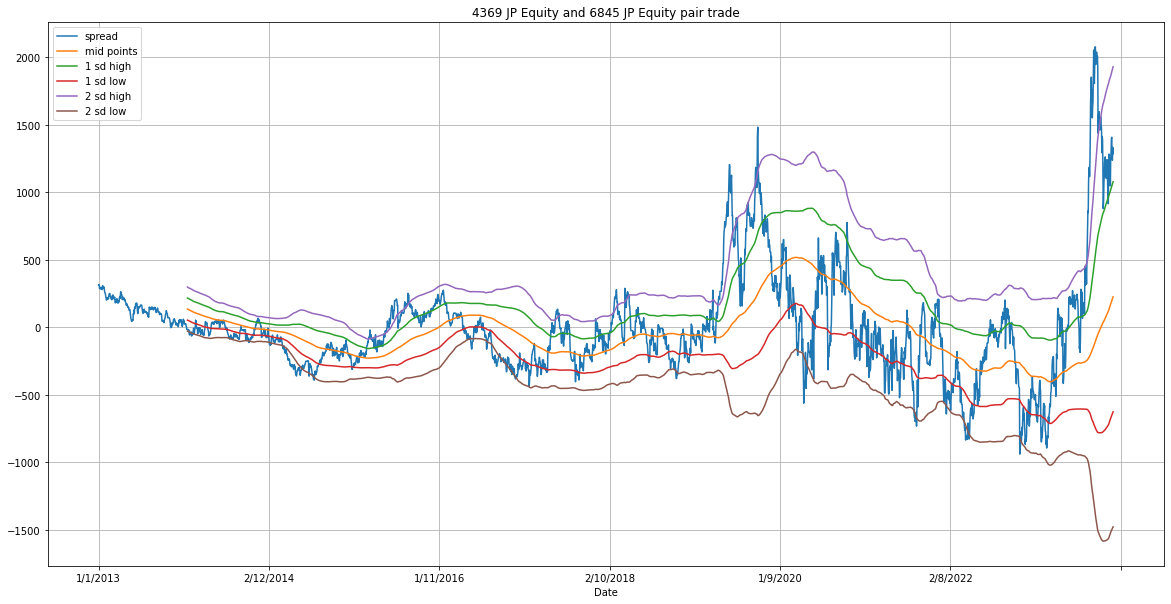

In [131]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
pairsOutcome[f'{pairOne} JP Equity {pairTwo} JP Equity']['spread'].plot(ax=ax1, label='spread', legend=True, grid=True, sharex=True)
pairsOutcome[f'{pairOne} JP Equity {pairTwo} JP Equity']['mid'].plot(ax=ax1, label='mid points', legend=True, grid=True, sharex= True)
pairsOutcome[f'{pairOne} JP Equity {pairTwo} JP Equity']['1sd high'].plot(ax=ax1, label='1 sd high', legend=True, grid=True, sharex= True)
pairsOutcome[f'{pairOne} JP Equity {pairTwo} JP Equity']['1sd low'].plot(ax=ax1, label='1 sd low', legend=True, grid=True, sharex= True)
pairsOutcome[f'{pairOne} JP Equity {pairTwo} JP Equity']['2sd high'].plot(ax=ax1, label='2 sd high', legend=True, grid=True, sharex= True)
pairsOutcome[f'{pairOne} JP Equity {pairTwo} JP Equity']['2sd low'].plot(ax=ax1, label='2 sd low', legend=True, grid=True, sharex= True)
plt.title(f"{pairOne} JP Equity and {pairTwo} JP Equity pair trade")
# df['position'].plot(ax=ax1, label='positions', legend=True, grid=True, style='x')
# df['cumpnl'].plot(ax=ax1, label='Cumulative PNL', legend=True, grid=True, sharex= True)

In [132]:
# df.loc[df['position'] != 0, 'plotposition'] = df['cumpnl']

Text(0.5, 1.0, '4369 JP Equity and 6845 JP Equity pair trade cumulative PNL')

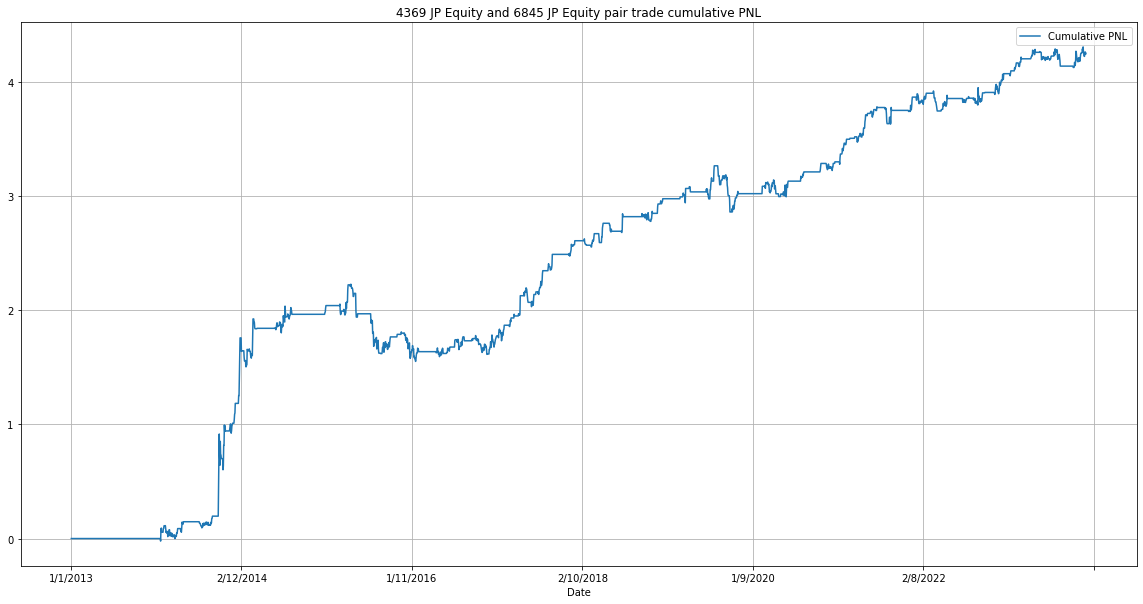

In [133]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
pairsOutcome[f'{pairOne} JP Equity {pairTwo} JP Equity']['cumpnl'].plot(ax=ax1, label='Cumulative PNL', legend=True, grid=True, sharex= True)
plt.title(f"{pairOne} JP Equity and {pairTwo} JP Equity pair trade cumulative PNL")

### Ignore the following

In [59]:
import pickle 

with open('saved_result.pkl', 'wb') as f:
    pickle.dump(pairsOutcome, f)

In [60]:
with open('saved_result.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

In [103]:
loaded_dict['4369 JP Equity 6845 JP Equity'].loc[loaded_dict['4369 JP Equity 6845 JP Equity']['position'] == 1]

spread         mid    1sd high     1sd low    2sd high  \
Date                                                                   
2/1/2014  -16.397198  132.952021  214.384682   51.519359  295.817344   
3/1/2014  -16.397198  131.690342  212.865013   50.515670  294.039685   
6/1/2014  -26.404849  130.390465  211.358498   49.422432  292.326531   
7/1/2014  -19.935623  129.225380  210.151763   48.298996  291.078146   
8/1/2014  -50.104708  127.919132  208.967894   46.870370  290.016656   
...              ...         ...         ...         ...         ...   
4/9/2023 -872.773569 -393.948184  -90.761299 -697.135069  212.425585   
5/9/2023 -803.281191 -395.537011  -91.297737 -699.776285  212.941537   
6/9/2023 -807.158097 -397.238110  -91.945875 -702.530346  213.346360   
7/9/2023 -818.604173 -399.026056  -92.640817 -705.411296  213.744422   
8/9/2023 -663.096832 -400.288871  -93.498386 -707.079356  213.292099   

              2sd low  position  4369 JP Equity position  \
Date                                                       
2/1/2014   -29.913302       1.0                      1.0   
3/1/2014   -30.659002       1.0                      1.0   
6/1/2014   -31.545601       1.0                      1.0   
7/1/2014   -32.627387       1.0                      1.0   
8/1/2014   -34.178392       1.0                      1.0   
...               ...       ...                      ...   
4/9/2023 -1000.321953       1.0                      1.0   
5/9/2023 -1004.015559       1.0                      1.0   
6/9/2023 -1007.822581       1.0                      1.0   
7/9/2023 -1011.796535       1.0                      1.0   
8/9/2023 -1013.869841       1.0                      1.0   

          6845 JP Equity position  dailypnl    cumpnl  
Date                                                   
2/1/2014                     -1.0  0.000000  0.000000  
3/1/2014                     -1.0 -0.022350 -0.022350  
6/1/2014                     -1.0  0.102662  0.080311  
7/1/2014                     -1.0  0.011508  0.091819  
8/1/2014                     -1.0 -0.036702  0.055117  
...                           ...       ...       ...  
4/9/2023                     -1.0  0.027584  4.176994  
5/9/2023                     -1.0 -0.000814  4.176180  
6/9/2023                     -1.0 -0.001550  4.174630  
7/9/2023                     -1.0  0.043476  4.218106  
8/9/2023                     -1.0 -0.014851  4.203254  

[628 rows x 11 columns]

In [134]:
cumpnlMoreThanOne = []

In [135]:
for x, y in loaded_dict.items():
  if (y.dropna()['cumpnl'][-1] > 1.5):
    cumpnlMoreThanOne.append(x)

/var/folders/b1/x4vbkfvn2qlf297m4zgbkw5h0000gn/T/ipykernel_2308/3636946757.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (y.dropna()['cumpnl'][-1] > 1.5):


In [136]:
len(cumpnlMoreThanOne)

374

In [125]:
totalCumPnl = pd.DataFrame()
totalCumPnl['totalCumPnl'] = loaded_dict[cumpnlMoreThanOne[0]].dropna()['cumpnl']
for x in range(1, len(cumpnlMoreThanOne)):
    totalCumPnl['totalCumPnl'] += loaded_dict[cumpnlMoreThanOne[x]].dropna()['cumpnl'] 
totalCumPnl

totalCumPnl
Date                  
1/1/2014      0.000000
2/1/2014      0.000000
3/1/2014      1.226138
6/1/2014      1.888256
7/1/2014      1.921194
...                ...
24/5/2024   714.442949
27/5/2024   714.575502
28/5/2024   714.752754
29/5/2024   715.218586
30/5/2024   715.889467

[2717 rows x 1 columns]

Text(0.5, 1.0, 'Top 374 cumulative PNL')

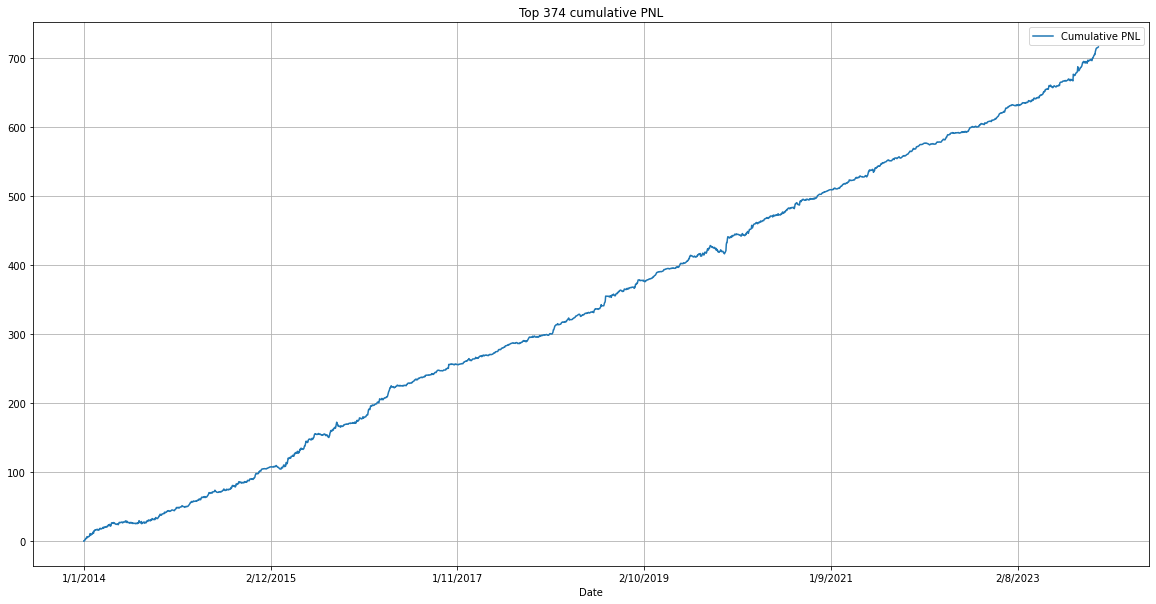

In [126]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
totalCumPnl['totalCumPnl'].plot(ax=ax1, label='Cumulative PNL', legend=True, grid=True, sharex= True)
plt.title(f"Top 374 cumulative PNL")

In [148]:
totalPosition = pd.DataFrame()
totalPosition['totalPositions'] = abs(loaded_dict[cumpnlMoreThanOne[0]].dropna()['position'])
for x in range(1, len(cumpnlMoreThanOne)):
    totalPosition['totalPositions'] += abs(loaded_dict[cumpnlMoreThanOne[x]].dropna()['position'])
totalPosition

totalPositions
Date                     
1/1/2014              0.0
2/1/2014            158.0
3/1/2014            161.0
6/1/2014            162.0
7/1/2014            163.0
...                   ...
24/5/2024            99.0
27/5/2024            97.0
28/5/2024           100.0
29/5/2024            98.0
30/5/2024           103.0

[2717 rows x 1 columns]

In [161]:
totalPosition['totalPositions'].iloc[1:].std() + totalPosition['totalPositions'].iloc[1:].mean()

159.88201031420493

Text(0.5, 1.0, 'Total Daily Positions')

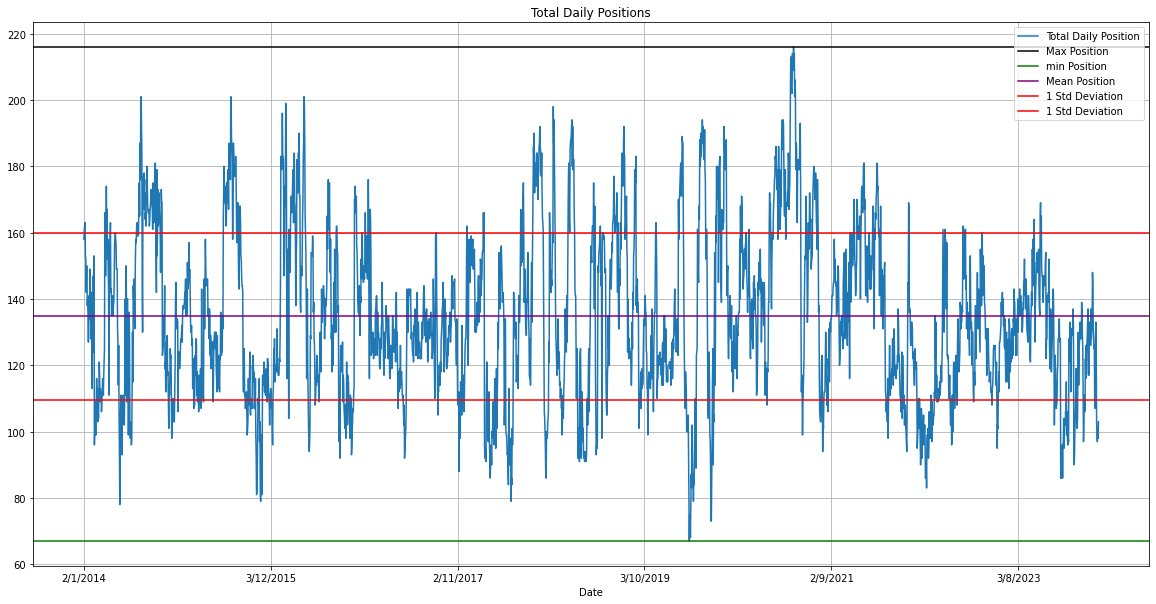

In [168]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
totalPosition['totalPositions'].iloc[1:].plot(ax=ax1, label='Total Daily Position', legend=True, grid=True, sharex= True)
plt.axhline(max(totalPosition['totalPositions'].iloc[1:]), color='black', label='Max Position')
plt.axhline(min(totalPosition['totalPositions'].iloc[1:]), color='g', label='min Position')
plt.axhline(totalPosition['totalPositions'].iloc[1:].mean(), color='purple', label='Mean Position')
plt.axhline(totalPosition['totalPositions'].iloc[1:].std() + totalPosition['totalPositions'].iloc[1:].mean(), label='1 Std Deviation', color='red')
plt.axhline(totalPosition['totalPositions'].iloc[1:].mean() - totalPosition['totalPositions'].iloc[1:].std(), label='1 Std Deviation', color='red')
plt.legend()
plt.title(f"Total Daily Positions")

In [ ]:
totalCumPnl_allpairs = pd.DataFrame()
totalCumPnl_allpairs['totalCumPnl'] = loaded_dict[cumpnlMoreThanOne[0]].dropna()['cumpnl']
for x in range(1, len(cumpnlMoreThanOne)):
    totalCumPnl_allpairs['totalCumPnl'] += loaded_dict[cumpnlMoreThanOne[x]].dropna()['cumpnl'] 